In [29]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import shap


In [31]:
df = pd.read_csv("./data/normalized_data")

In [33]:
df = df.drop(columns=[ 'Unnamed: 0'])

In [35]:
df = df[df['CLAIM_FLAG'] == 1]

In [37]:
scaleclms = ['YOJ','INCOME','HOME_VAL','BLUEBOOK','TRAVTIME','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS', 'CAR_AGE', 'GEN_AGE']

In [39]:
scaler = StandardScaler()

In [41]:
df[scaleclms] = scaler.fit_transform(df[scaleclms])

In [43]:
y = df['CLM_AMT']
x = df.drop(columns=['CLM_AMT'])

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Assuming df is your DataFrame
filtered_df = df[df['CLAIM_FLAG'] == 1]


In [ ]:
filtered_df

In [ ]:
df = df.drop(columns=['CLAIM_FLAG', 'Unnamed: 0'])

In [ ]:
y = df['CLM_AMT']
x = df.drop(columns=['CLM_AMT'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
# Initialize the SVR model with an RBF kernel
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svr_rbf.fit(x_train, y_train)

# Predict on the test set
y_pred = svr_rbf.predict(x_test)


In [49]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 70211035.33534457
R-Squared: -0.022843452191758207
Mean Absolute Error (MAE): 2966.5779262291767


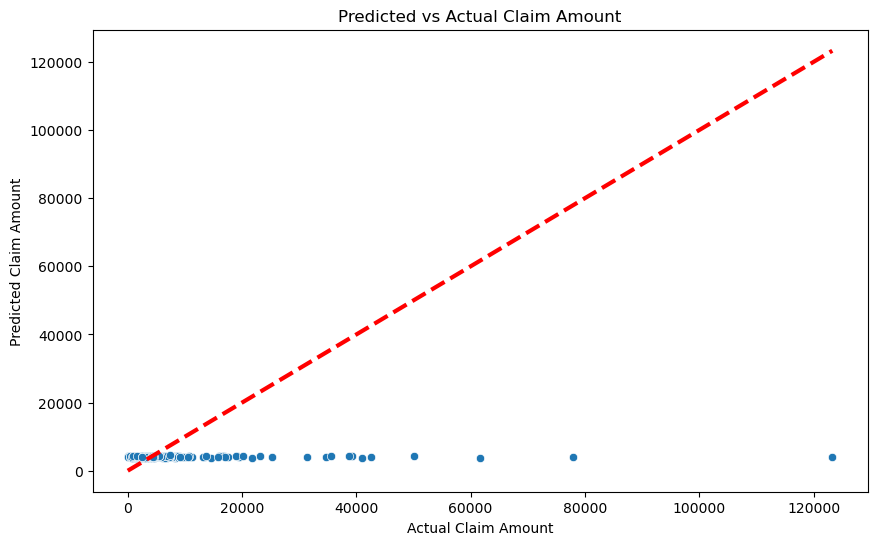

In [51]:
# Predicted vs Actual values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)  # Line of perfect prediction
plt.xlabel("Actual Claim Amount")
plt.ylabel("Predicted Claim Amount")
plt.title("Predicted vs Actual Claim Amount")
plt.show()

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearch to the data
grid_search.fit(x_train, y_train)

# Best model hyperparameters
best_svr = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Predict with the best model
y_pred_best = best_svr.predict(x_test)

# Evaluate the best model
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
best_mae = mean_absolute_error(y_test, y_pred_best)

# Print the evaluation results of the best model
print(f"Best MSE: {best_mse}")
print(f"Best R-Squared: {best_r2}")
print(f"Best MAE: {best_mae}")


In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Claim Amount')
plt.ylabel('Predicted Claim Amount')
plt.title('SVR: Predicted vs Actual Claim Amount')
plt.show()


In [ ]:
# Use KernelExplainer for SHAP with SVR
explainer = shap.KernelExplainer(svr_rbf.predict, x_train)
shap_values = explainer.shap_values(x_test)

# Plot summary plot
shap.summary_plot(shap_values, x_test_scaled, feature_names=x.columns)
